In [1]:
#ty simply predicting using vgg

In [14]:
import keras
import numpy as np
#import models
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
#load image preprocessing functions
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#Import the various models
vgg_model = vgg16.VGG16(weights='imagenet')

inception_model = inception_v3.InceptionV3(weights='imagenet')

resnet_model = resnet50.ResNet50(weights='imagenet')

mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [16]:
#image name
filename = 'C:/Users/RAHUL/Desktop/sample.jpg'

PIL image size (224, 224)


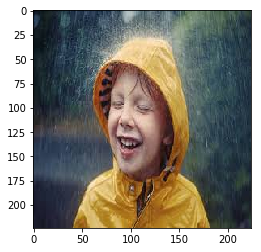

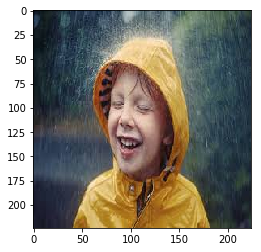

numpy array size (224, 224, 3)


In [17]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image batch size (1, 224, 224, 3)


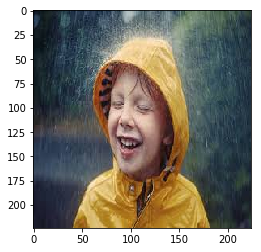

In [18]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [19]:
#VGG predictions
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch)
#Idk why he had added .copy in the code

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
label_vgg

[[('n03045698', 'cloak', 0.3227146),
  ('n02869837', 'bonnet', 0.22898124),
  ('n03534580', 'hoopskirt', 0.05644298),
  ('n04532106', 'vestment', 0.050004825),
  ('n03980874', 'poncho', 0.045382716)]]

In [20]:
#resnet predictions
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n03045698', 'cloak', 0.67409),
  ('n04584207', 'wig', 0.048443474),
  ('n03495258', 'harp', 0.04058051)]]

In [22]:
#Mobile net predictions


# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
label_mobilenet



[[('n03045698', 'cloak', 0.44352096),
  ('n04209133', 'shower_cap', 0.1819821),
  ('n04584207', 'wig', 0.1500892),
  ('n02869837', 'bonnet', 0.14727946),
  ('n02883205', 'bow_tie', 0.01367358)]]

In [23]:
#inception v3 predictions
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
label_inception

[[('n02869837', 'bonnet', 0.42861694),
  ('n03045698', 'cloak', 0.21314596),
  ('n04525038', 'velvet', 0.03339675),
  ('n04370456', 'sweatshirt', 0.032157447),
  ('n04584207', 'wig', 0.02074876)]]

In [24]:
import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
numpy_image = cv2.resize(numpy_image, (700,700))
cv2.imwrite("images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

True

(-0.5, 699.5, 699.5, -0.5)

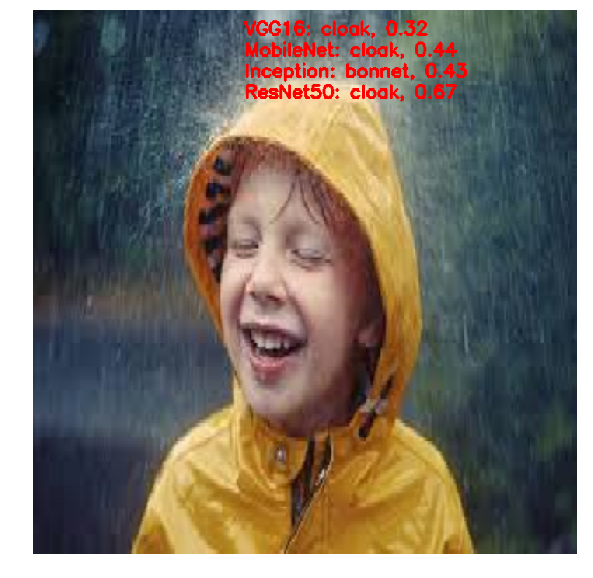

In [25]:


plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off')

